In [ ]:
# Test loading and using the saved model
print("=" * 60)
print("TESTING MODEL LOADING AND PREDICTIONS")
print("=" * 60 + "\n")

# Load the saved model
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_encoders = joblib.load(encoders_filename)

print("✅ Model files loaded successfully!")

# Make predictions on test set using loaded model
y_test_pred_loaded = loaded_model.predict(X_test_scaled)
test_r2_loaded = r2_score(y_test, y_test_pred_loaded)

print(f"\n✓ Predictions made using loaded model")
print(f"   Test R² Score: {test_r2_loaded:.4f}")

# Test with a sample prediction
print(f"\n📋 Sample Predictions (First 5 test samples):")
print(f"\n{'Index':<6} {'Actual Yield':<15} {'Predicted Yield':<18} {'Error':<10}")
print("-" * 50)

for i in range(min(5, len(y_test))):
    actual = y_test.iloc[i]
    predicted = y_test_pred_loaded[i]
    error = abs(actual - predicted)
    print(f"{i:<6} {actual:<15.4f} {predicted:<18.4f} {error:<10.4f}")

print("\n🎉 Model Successfully Saved and Validated!")
print(f"\nYou can now use this model for predictions in your application:"
      f"\n  - Load model: joblib.load('{model_filename}')"
      f"\n  - Load scaler: joblib.load('{scaler_filename}')"
      f"\n  - Load encoders: joblib.load('{encoders_filename}')")

TESTING MODEL LOADING AND PREDICTIONS

✅ Model files loaded successfully!

✓ Predictions made using loaded model
   Test R² Score: 0.9839

📋 Sample Predictions (First 5 test samples):

Index  Actual Yield    Predicted Yield    Error     
--------------------------------------------------
0      4.6750          4.6597             0.0153    
1      3.3440          3.6554             0.3114    
2      5.3170          5.3503             0.0333    
3      104.2140        95.4027            8.8113    
4      2.4720          2.1595             0.3125    

🎉 Model Successfully Saved and Validated!

You can now use this model for predictions in your application:
  - Load model: joblib.load('../backend/data/models/yield_prediction_model_best.pkl')
  - Load scaler: joblib.load('../backend/data/models/yield_prediction_scaler.pkl')
  - Load encoders: joblib.load('../backend/data/models/label_encoders.pkl')


: 

## Section 9: Test Model Loading and Predictions

In [13]:
# Create models directory if it doesn't exist
models_dir = '../backend/data/models'
os.makedirs(models_dir, exist_ok=True)

# Save the best model
model_filename = f'{models_dir}/yield_prediction_model_best.pkl'
scaler_filename = f'{models_dir}/yield_prediction_scaler.pkl'
encoders_filename = f'{models_dir}/label_encoders.pkl'

print("=" * 60)
print("SAVING BEST MODEL")
print("=" * 60 + "\n")

# Save model
joblib.dump(best_model, model_filename)
print(f"✅ Model saved: {model_filename}")
print(f"   File size: {os.path.getsize(model_filename) / 1024:.2f} KB")

# Save scaler
joblib.dump(scaler, scaler_filename)
print(f"\n✅ Scaler saved: {scaler_filename}")
print(f"   File size: {os.path.getsize(scaler_filename) / 1024:.2f} KB")

# Save label encoders
joblib.dump(label_encoders, encoders_filename)
print(f"\n✅ Label Encoders saved: {encoders_filename}")
print(f"   File size: {os.path.getsize(encoders_filename) / 1024:.2f} KB")

# Create model metadata
metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'training_date': datetime.now().isoformat(),
    'train_r2': float(train_r2),
    'test_r2': float(test_r2),
    'train_rmse': float(train_rmse),
    'test_rmse': float(test_rmse),
    'train_mae': float(train_mae),
    'test_mae': float(test_mae),
    'mape': float(mape),
    'cv_mean_r2': float(cv_scores.mean()),
    'cv_std_r2': float(cv_scores.std()),
    'best_hyperparameters': best_params,
    'feature_columns': X.columns.tolist(),
    'categorical_columns': categorical_cols,
    'numerical_columns': numerical_cols,
    'target_column': target_column,
    'training_samples': int(len(X_train)),
    'test_samples': int(len(X_test)),
    'total_samples': int(len(X))
}

import json
metadata_filename = f'{models_dir}/model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"\n✅ Model metadata saved: {metadata_filename}\n")

# Print summary
print("=" * 60)
print("MODEL TRAINING SUMMARY")
print("=" * 60)
print(f"\n🤖 Model: {best_model_name}")
print(f"📊 Test R² Score: {test_r2:.4f}")
print(f"📊 Test RMSE: {test_rmse:.4f}")
print(f"📊 Test MAE: {test_mae:.4f}")
print(f"📊 MAPE: {mape:.2f}%")
print(f"\n✅ All model files saved successfully!")
print(f"   - Model: {model_filename}")
print(f"   - Scaler: {scaler_filename}")
print(f"   - Encoders: {encoders_filename}")
print(f"   - Metadata: {metadata_filename}")

print(f"\n🎉 Training Complete! Model is ready for deployment.")

SAVING BEST MODEL

✅ Model saved: ../backend/data/models/yield_prediction_model_best.pkl
   File size: 447.52 KB

✅ Scaler saved: ../backend/data/models/yield_prediction_scaler.pkl
   File size: 1.08 KB

✅ Label Encoders saved: ../backend/data/models/label_encoders.pkl
   File size: 9.20 KB

✅ Model metadata saved: ../backend/data/models/model_metadata.json

MODEL TRAINING SUMMARY

🤖 Model: Gradient Boosting
📊 Test R² Score: 0.9839
📊 Test RMSE: 3.1104
📊 Test MAE: 1.2631
📊 MAPE: 14.87%

✅ All model files saved successfully!
   - Model: ../backend/data/models/yield_prediction_model_best.pkl
   - Scaler: ../backend/data/models/yield_prediction_scaler.pkl
   - Encoders: ../backend/data/models/label_encoders.pkl
   - Metadata: ../backend/data/models/model_metadata.json

🎉 Training Complete! Model is ready for deployment.


## Section 8: Save the Best Model

✓ Prediction plots saved!


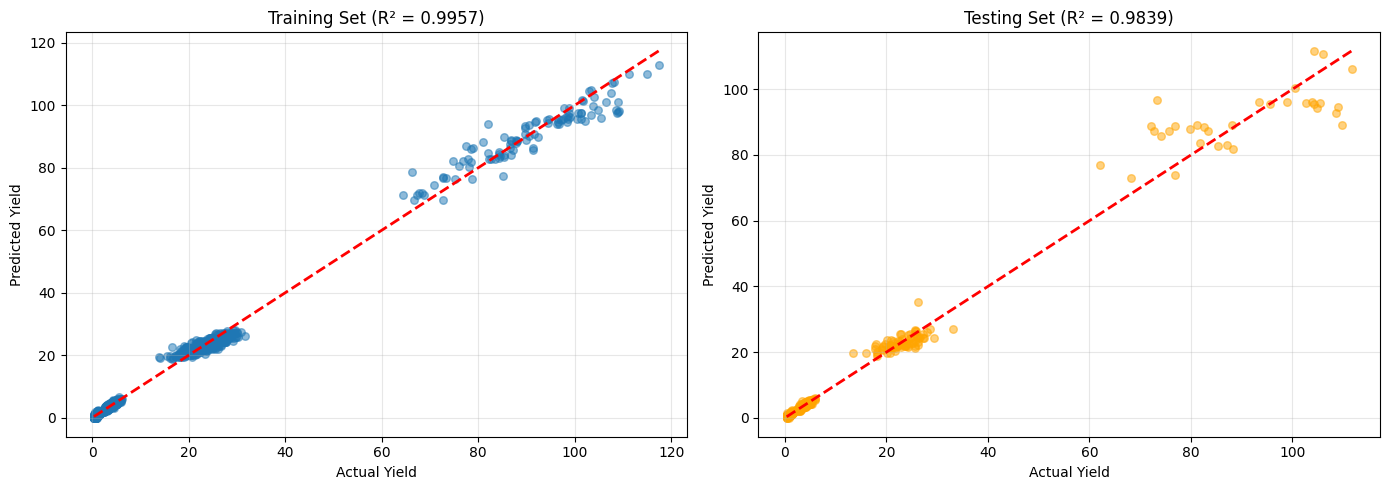

In [11]:
# Visualize Predictions vs Actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Yield')
axes[0].set_ylabel('Predicted Yield')
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})')
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Yield')
axes[1].set_ylabel('Predicted Yield')
axes[1].set_title(f'Testing Set (R² = {test_r2:.4f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../backend/data/models/predictions_vs_actual.png', dpi=300, bbox_inches='tight')
print("✓ Prediction plots saved!")
plt.show()


DETAILED PERFORMANCE METRICS - BEST MODEL

📊 R² Score (Coefficient of Determination):
   Training: 0.9957
   Testing:  0.9839

📊 RMSE (Root Mean Squared Error):
   Training: 1.4701
   Testing:  3.1104

📊 MAE (Mean Absolute Error):
   Training: 0.7483
   Testing:  1.2631

📊 MAPE (Mean Absolute Percentage Error): 14.87%

📊 Cross-Validation R² Scores: [0.99091342 0.99160304 0.98851428 0.98585351 0.9898861 ]
   Mean: 0.9894 (+/- 0.0041)

🎯 Top 10 Most Important Features:
              Feature  Importance
            Crop Type    0.980412
      Irrigation Type    0.011536
            Soil Type    0.004724
        Planting Date    0.001949
Field Size (hectares)    0.001198
      Fertilizer Used    0.000181

📊 Cross-Validation R² Scores: [0.99091342 0.99160304 0.98851428 0.98585351 0.9898861 ]
   Mean: 0.9894 (+/- 0.0041)

🎯 Top 10 Most Important Features:
              Feature  Importance
            Crop Type    0.980412
      Irrigation Type    0.011536
            Soil Type    0.004724
 

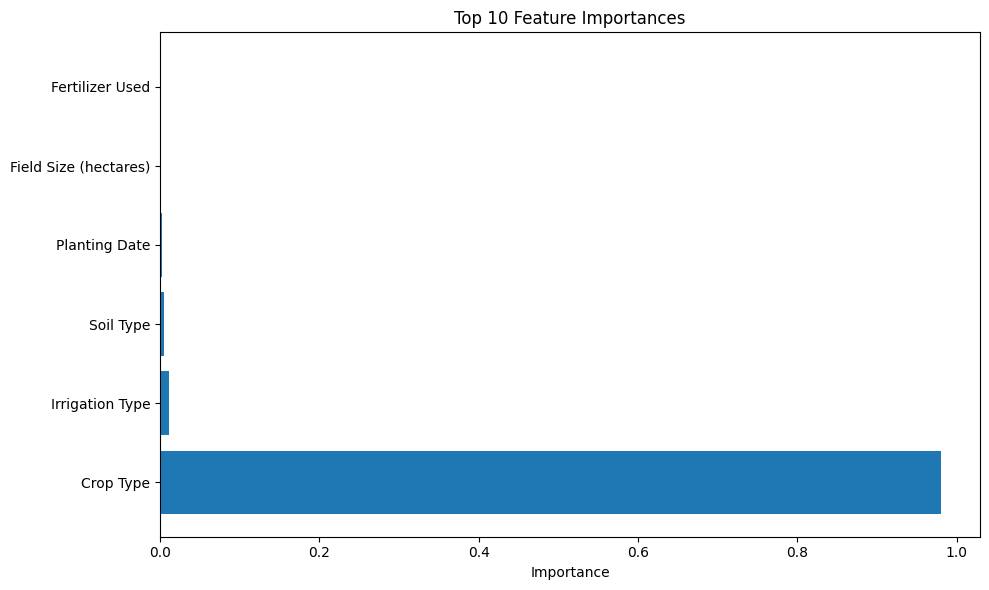

In [10]:
# Detailed Performance Evaluation
print("\n" + "=" * 60)
print("DETAILED PERFORMANCE METRICS - BEST MODEL")
print("=" * 60 + "\n")

y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"📊 R² Score (Coefficient of Determination):")
print(f"   Training: {train_r2:.4f}")
print(f"   Testing:  {test_r2:.4f}")

print(f"\n📊 RMSE (Root Mean Squared Error):")
print(f"   Training: {train_rmse:.4f}")
print(f"   Testing:  {test_rmse:.4f}")

print(f"\n📊 MAE (Mean Absolute Error):")
print(f"   Training: {train_mae:.4f}")
print(f"   Testing:  {test_mae:.4f}")

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f"\n📊 MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\n📊 Cross-Validation R² Scores: {cv_scores}")
print(f"   Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\n🎯 Top 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.savefig('../backend/data/models/feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Feature importance plot saved!")

## Section 7: Evaluate Model Performance

In [9]:
# Compare best models and select the best one
print("\n" + "=" * 60)
print("MODEL COMPARISON: Best Tuned Models")
print("=" * 60 + "\n")

# Evaluate tuned Random Forest
rf_best = rf_grid_search.best_estimator_
rf_results = evaluate_model(rf_best, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest (Tuned)")

# Evaluate tuned Gradient Boosting
gb_best = gb_grid_search.best_estimator_
gb_results = evaluate_model(gb_best, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting (Tuned)")

# Select the best performing model
print("=" * 60)
print("SELECTING BEST MODEL")
print("=" * 60 + "\n")

if rf_results['test_r2'] > gb_results['test_r2']:
    best_model = rf_best
    best_model_name = "Random Forest"
    best_cv_score = rf_grid_search.best_score_
    best_params = rf_grid_search.best_params_
    print(f"✅ Selected Model: {best_model_name}")
    print(f"   CV Score (R²): {best_cv_score:.4f}")
    print(f"   Test R²: {rf_results['test_r2']:.4f}")
    print(f"   Test RMSE: {rf_results['test_rmse']:.4f}")
else:
    best_model = gb_best
    best_model_name = "Gradient Boosting"
    best_cv_score = gb_grid_search.best_score_
    best_params = gb_grid_search.best_params_
    print(f"✅ Selected Model: {best_model_name}")
    print(f"   CV Score (R²): {best_cv_score:.4f}")
    print(f"   Test R²: {gb_results['test_r2']:.4f}")
    print(f"   Test RMSE: {gb_results['test_rmse']:.4f}")

print(f"\n📌 Best Hyperparameters:")
for param, value in best_params.items():
    print(f"   - {param}: {value}")


MODEL COMPARISON: Best Tuned Models

📊 Random Forest (Tuned):
   Train R²: 1.0000 | Test R²: 0.9465
   Train RMSE: 0.0406 | Test RMSE: 5.6698
   Train MAE: 0.0175 | Test MAE: 2.6565

📊 Gradient Boosting (Tuned):
   Train R²: 0.9957 | Test R²: 0.9839
   Train RMSE: 1.4701 | Test RMSE: 3.1104
   Train MAE: 0.7483 | Test MAE: 1.2631

SELECTING BEST MODEL

✅ Selected Model: Gradient Boosting
   CV Score (R²): 0.9894
   Test R²: 0.9839
   Test RMSE: 3.1104

📌 Best Hyperparameters:
   - learning_rate: 0.05
   - max_depth: 4
   - min_samples_leaf: 2
   - min_samples_split: 2
   - n_estimators: 200
   - subsample: 1.0
📊 Random Forest (Tuned):
   Train R²: 1.0000 | Test R²: 0.9465
   Train RMSE: 0.0406 | Test RMSE: 5.6698
   Train MAE: 0.0175 | Test MAE: 2.6565

📊 Gradient Boosting (Tuned):
   Train R²: 0.9957 | Test R²: 0.9839
   Train RMSE: 1.4701 | Test RMSE: 3.1104
   Train MAE: 0.7483 | Test MAE: 1.2631

SELECTING BEST MODEL

✅ Selected Model: Gradient Boosting
   CV Score (R²): 0.9894
  

## Section 6: Train Best Model

In [8]:
print("🔍 Starting Hyperparameter Tuning with GridSearchCV...\n")

# ===== RANDOM FOREST TUNING =====
print("=" * 60)
print("TUNING: Random Forest Regressor")
print("=" * 60 + "\n")

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_grid_search = GridSearchCV(
    rf_model, 
    rf_param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("🚀 Training Random Forest with GridSearch...")
rf_grid_search.fit(X_train_scaled, y_train)

print(f"\n✓ Best parameters found:")
for param, value in rf_grid_search.best_params_.items():
    print(f"  - {param}: {value}")

print(f"\n✓ Best CV Score (R²): {rf_grid_search.best_score_:.4f}")

# ===== GRADIENT BOOSTING TUNING =====
print("\n" + "=" * 60)
print("TUNING: Gradient Boosting Regressor")
print("=" * 60 + "\n")

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9, 1.0]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(
    gb_model, 
    gb_param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("🚀 Training Gradient Boosting with GridSearch...")
gb_grid_search.fit(X_train_scaled, y_train)

print(f"\n✓ Best parameters found:")
for param, value in gb_grid_search.best_params_.items():
    print(f"  - {param}: {value}")

print(f"\n✓ Best CV Score (R²): {gb_grid_search.best_score_:.4f}")

🔍 Starting Hyperparameter Tuning with GridSearchCV...

TUNING: Random Forest Regressor

🚀 Training Random Forest with GridSearch...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

✓ Best parameters found:
  - bootstrap: False
  - max_depth: 20
  - max_features: sqrt
  - min_samples_leaf: 1
  - min_samples_split: 2
  - n_estimators: 100

✓ Best CV Score (R²): 0.9488

TUNING: Gradient Boosting Regressor

🚀 Training Gradient Boosting with GridSearch...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✓ Best parameters found:
  - bootstrap: False
  - max_depth: 20
  - max_features: sqrt
  - min_samples_leaf: 1
  - min_samples_split: 2
  - n_estimators: 100

✓ Best CV Score (R²): 0.9488

TUNING: Gradient Boosting Regressor

🚀 Training Gradient Boosting with GridSearch...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✓ Best parameters found:
  - learning_rate: 0.05
  - max_depth: 4
  - min_samples_leaf: 2
  - min_samples_split: 2
  - n_esti

## Section 5: Perform Hyperparameter Tuning with GridSearchCV

In [7]:
# Create baseline models
print("🤖 Creating Baseline Models...\n")

# Model 1: Random Forest with default parameters
baseline_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
baseline_rf.fit(X_train_scaled, y_train)

# Model 2: Gradient Boosting with default parameters
baseline_gb = GradientBoostingRegressor(random_state=42)
baseline_gb.fit(X_train_scaled, y_train)

# Evaluate baseline models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"📊 {model_name}:")
    print(f"   Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"   Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"   Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}\n")
    
    return {'train_r2': train_r2, 'test_r2': test_r2, 'test_rmse': test_rmse}

print("=== BASELINE MODELS ===\n")
rf_baseline = evaluate_model(baseline_rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest (Baseline)")
gb_baseline = evaluate_model(baseline_gb, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting (Baseline)")

🤖 Creating Baseline Models...

=== BASELINE MODELS ===

📊 Random Forest (Baseline):
   Train R²: 0.9983 | Test R²: 0.9771
   Train RMSE: 0.9263 | Test RMSE: 3.7077
   Train MAE: 0.3635 | Test MAE: 1.3826

📊 Gradient Boosting (Baseline):
   Train R²: 0.9910 | Test R²: 0.9794
   Train RMSE: 2.1185 | Test RMSE: 3.5213
   Train MAE: 1.0976 | Test MAE: 1.5818

=== BASELINE MODELS ===

📊 Random Forest (Baseline):
   Train R²: 0.9983 | Test R²: 0.9771
   Train RMSE: 0.9263 | Test RMSE: 3.7077
   Train MAE: 0.3635 | Test MAE: 1.3826

📊 Gradient Boosting (Baseline):
   Train R²: 0.9910 | Test R²: 0.9794
   Train RMSE: 2.1185 | Test RMSE: 3.5213
   Train MAE: 1.0976 | Test MAE: 1.5818



## Section 4: Define Baseline Model

In [6]:
# Prepare features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

print(f"📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"\n✓ Train set size: {X_train.shape[0]} samples")
print(f"✓ Test set size: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features scaled using StandardScaler")
print(f"Train set - Mean: {X_train_scaled.mean():.4f}, Std: {X_train_scaled.std():.4f}")
print(f"Test set - Mean: {X_test_scaled.mean():.4f}, Std: {X_test_scaled.std():.4f}")

📊 Features shape: (2000, 6)
🎯 Target shape: (2000,)

✓ Train set size: 1600 samples
✓ Test set size: 400 samples

✓ Features scaled using StandardScaler
Train set - Mean: 0.0000, Std: 1.0000
Test set - Mean: -0.0082, Std: 0.9867


## Section 3: Split Data into Train and Test Sets

In [5]:
# Data Preprocessing

# Create a copy for processing
data = df.copy()

# Check target variable
target_column = 'Yield_t_per_ha'
print(f"🎯 Target Variable: {target_column}")
print(f"Target Range: {data[target_column].min():.2f} - {data[target_column].max():.2f}")

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove(target_column)  # Remove target from features

print(f"\n📊 Categorical Columns: {categorical_cols}")
print(f"📊 Numerical Columns: {numerical_cols}")

# Handle missing values (if any)
if data.isnull().sum().sum() > 0:
    print("\n⚠️ Handling missing values...")
    data = data.dropna()
    print(f"✓ Rows after removing NaN: {len(data)}")

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n✓ Data preprocessing completed!")
print(f"Final dataset shape: {data.shape}")

🎯 Target Variable: Yield_t_per_ha
Target Range: 0.34 - 117.47

📊 Categorical Columns: ['Crop Type', 'Planting Date', 'Soil Type', 'Fertilizer Used', 'Irrigation Type']
📊 Numerical Columns: ['Field Size (hectares)']
✓ Encoded Crop Type: {'Cotton': np.int64(0), 'Groundnut': np.int64(1), 'Maize': np.int64(2), 'Onion': np.int64(3), 'Potato': np.int64(4), 'Rice': np.int64(5), 'Soybean': np.int64(6), 'Sugarcane': np.int64(7), 'Wheat': np.int64(8)}
✓ Encoded Planting Date: {'01-01-2024': np.int64(0), '01-01-2025': np.int64(1), '01-02-2023': np.int64(2), '01-02-2025': np.int64(3), '01-04-2023': np.int64(4), '01-05-2024': np.int64(5), '01-05-2025': np.int64(6), '01-06-2023': np.int64(7), '01-06-2024': np.int64(8), '01-06-2025': np.int64(9), '01-07-2023': np.int64(10), '01-07-2024': np.int64(11), '01-07-2025': np.int64(12), '01-09-2024': np.int64(13), '01-09-2025': np.int64(14), '01-10-2023': np.int64(15), '01-10-2024': np.int64(16), '01-10-2025': np.int64(17), '01-11-2023': np.int64(18), '01-11

## Section 2: Preprocess Data

In [4]:
# Load Dataset
dataset_path = '../backend/data/datasets/plantvillage/yield_dataset.csv'
df = pd.read_csv(dataset_path)

print("📊 Dataset Shape:", df.shape)
print("\n📋 First 5 rows:")
print(df.head())

print("\n📈 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

print("\n🏷️ Column Names:")
print(df.columns.tolist())

print("\n📊 Data Types:")
print(df.dtypes)

# Check for duplicates
print(f"\n⚠️ Duplicate Rows: {df.duplicated().sum()}")

📊 Dataset Shape: (2000, 7)

📋 First 5 rows:
   Crop Type  Field Size (hectares) Planting Date Soil Type  \
0    Soybean                   1.04    08-06-2025     Loamy   
1     Cotton                   0.44    07-04-2023     Loamy   
2  Groundnut                   0.22    26-06-2024  Alluvial   
3      Maize                   2.56    04-10-2024     Sandy   
4    Soybean                   0.14    13-06-2025     Sandy   

          Fertilizer Used          Irrigation Type  Yield_t_per_ha  
0                    Urea  Furrow/Canal irrigation           1.111  
1                     MOP                  Rainfed           0.461  
2  Compost/Organic Manure     Sprinkler Irrigation           1.576  
3                    Urea  Furrow/Canal irrigation           3.713  
4                     DAP                  Rainfed           0.774  

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Cou

## Section 1: Load and Explore Dataset

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import os
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")
print(f"Timestamp: {datetime.now()}")

✓ All libraries imported successfully!
Timestamp: 2025-11-18 10:15:44.136334


In [2]:
pip install scikit-learn pandas numpy matplotlib seaborn joblib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.14 requires attrs>=19.1.0, which is not installed.
mediapipe 0.10.14 requires protobuf<5,>=4.25.3, but you have protobuf 6.32.0 which is incompatible.



  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.2 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.2 MB 4.4 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.2 MB 5.1 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.2 MB 5.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.2 MB 4.8 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.2 MB 4.6 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.2 MB 4.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.2 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.2 MB 4.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.2 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.2 MB 4.6 MB/s eta 0:00:01
   --

# Crop Yield Prediction Model Training
## Hyperparameter Tuning & Model Optimization

This notebook trains a machine learning model to predict crop yield with optimal hyperparameters using GridSearchCV, evaluates performance, and saves the best model.